In [ ]:
Project of the machine learning

# multimodal analysis of sentiment based on tweets via stock price prediction .

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
filename = "stock.csv"

df = pd.read_csv(filename)

In [ ]:
print("Dataset Description:")
print(df.describe())
print("\nDataset Info:")
print(df.info())

Dataset Description:
             Open        High         Low       Close
count  249.000000  249.000000  249.000000  249.000000
mean   210.275663  214.744739  205.744137  210.445060
std     44.249049   44.596117   43.970412   44.300494
min    103.000000  111.750000  101.810000  108.100000
25%    179.940000  184.220000  176.350000  180.590000
50%    211.320000  217.250000  206.110000  212.080000
75%    248.610000  254.280000  243.000000  249.700000
max    279.560000  285.300000  277.600000  282.480000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          249 non-null    object 
 1   Open          249 non-null    float64
 2   High          249 non-null    float64
 3   Low           249 non-null    float64
 4   Close         249 non-null    float64
 5   Volume        249 non-null    object 
 6   Tweet         249 non-nul

In [ ]:
print(df.head())

         Date    Open    High     Low   Close       Volume  \
0  12/22/2023  103.00  111.75  101.81  108.10  101,077,602   
1  12/11/2023  109.11  114.39  104.64  109.10  101,377,906   
2   12/8/2023  110.35  114.59  107.16  110.34  101,543,297   
3   12/7/2023  110.51  116.27  107.52  112.71  101,596,305   
4   12/6/2023  116.55  118.80  108.24  113.06  101,752,898   

                                               Tweet Company Name  Stock Name  
0  On December 22, 2022, Tesla tweeted about the ...  Tesla, Inc.        TSLA  
1  $TSLA #TSLA Bull case (weekly) vs. bear case (...  Tesla, Inc.        TSLA  
2  @TroyTeslike If you add back the 80K or so los...  Tesla, Inc.        TSLA  
3  36 hours and counting. I now have full confide...  Tesla, Inc.        TSLA  
4  Help to to trading $SPY , $QQQ , $VIX , $TSLA ...  Tesla, Inc.        TSLA  


In [ ]:
# Data Exploration and Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
# Filter the DataFrame for January 2023 to December 2023
start_date = '2023-01-01'
end_date = '2023-12-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(df_filtered['Close'].dtype)

float64


In [ ]:
# Handle SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Convert 'Close' column to string, remove commas, and convert to numeric
df_filtered['Close'] = pd.to_numeric(df_filtered['Close'].astype(str).str.replace(',', ''), errors='coerce')

# Impute missing values (replace NaN with mean)
df_filtered = df_filtered.fillna(df_filtered['Close'].mean())

# Feature Engineering
df_filtered['Close_Pct_Change'] = df_filtered['Close'].pct_change()

In [ ]:
# Convert 'Volume' to Numeric
df_filtered['Volume'] = df_filtered['Volume'].astype(str).str.replace(',', '').astype(float)

# Check for NaN values after the conversion
print(df_filtered.isnull().sum())

# Handle missing values in 'Close_Pct_Change' column (replace NaN with mean)
df_filtered['Close_Pct_Change'].fillna(df_filtered['Close_Pct_Change'].mean(), inplace=True)

# Verify that there are no missing values after handling
print(df_filtered.isnull().sum())

# Regression Model
X = df_filtered[['Open', 'High', 'Low', 'Volume', 'Close_Pct_Change']]
y = df_filtered['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Tweet               0
Company Name        0
 Stock Name         0
Close_Pct_Change    0
dtype: int64
Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Tweet               0
Company Name        0
 Stock Name         0
Close_Pct_Change    0
dtype: int64


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Create a linear regression model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Print the model's score on the test data
print(f'Model Score: {regression_model.score(X_test, y_test)}')

Model Score: -484800149139.95544


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Fit the training data to the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Show the regression model's score
train_score = regression_model.score(X_train, y_train)
test_score = regression_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.9995933593089116
Testing Score: -484800149139.95544


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


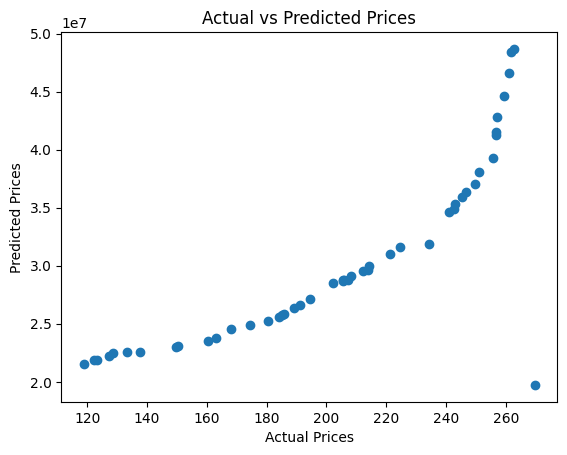

In [ ]:
# Visualize Actual vs. Predicted Prices

# Predict prices on the test set
y_pred = regression_model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

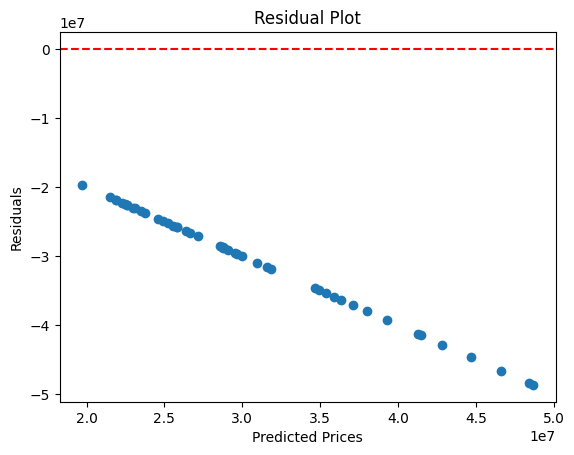

In [ ]:
#Show errors against predicted values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

In [ ]:
df_filtered_reset = df_filtered.reset_index(drop=True)
print(df_filtered_reset['Date'].shape)
print(y_test.shape)
print(y_pred.shape)

(238,)
(48,)
(48,)


Impact of Volume on Close Price

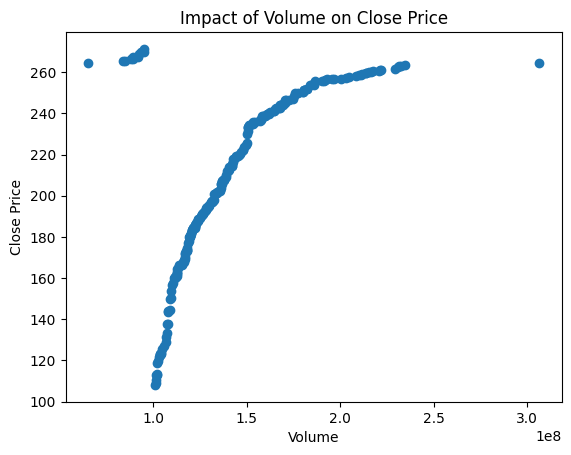

In [ ]:
# Analyze the impact of 'Volume' on 'Close' price
plt.scatter(df_filtered['Volume'], df_filtered['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Impact of Volume on Close Price')
plt.show()

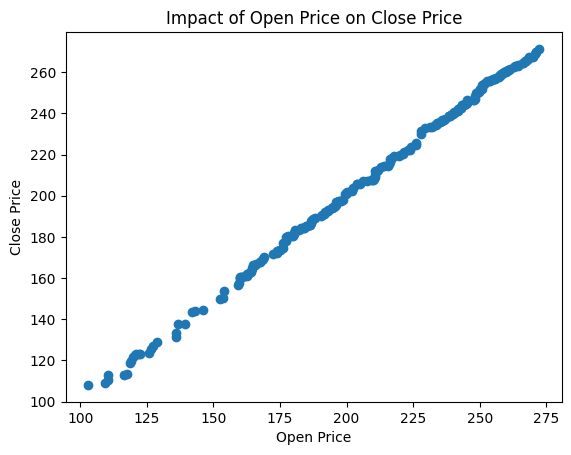

In [ ]:
# Analyze the impact of 'Open' price on 'Close' price
plt.scatter(df_filtered['Open'], df_filtered['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Impact of Open Price on Close Price')
plt.show()

Day with Greatest Close Percentage Change

In [ ]:
max_close_change_day = df_filtered.loc[df_filtered['Close_Pct_Change'].idxmax()]
print("Day with Greatest Close Percentage Change:")
print(max_close_change_day)

Day with Greatest Close Percentage Change:
Date                                              2023-12-04 00:00:00
Open                                                           118.47
High                                                           122.63
Low                                                            114.92
Close                                                          118.85
Volume                                                    101993602.0
Tweet               End of quarter time and @Tesla is clearing out...
Company Name                                              Tesla, Inc.
 Stock Name                                                      TSLA
Close_Pct_Change                                             0.045847
Name: 6, dtype: object


Day with Smallest Close Percentage Change

In [ ]:
min_close_change_day = df_filtered.loc[df_filtered['Close_Pct_Change'].idxmin()]
print("Day with Smallest Close Percentage Change:")
print(min_close_change_day)

Day with Smallest Close Percentage Change:
Date                                              2023-01-13 00:00:00
Open                                                           267.48
High                                                            270.9
Low                                                             261.2
Close                                                          265.28
Volume                                                     84582172.0
Tweet               Hearing reports some Netflix $NFLX shareholder...
Company Name                                            Netflix, Inc.
 Stock Name                                                      NFLX
Close_Pct_Change                                                  0.0
Name: 229, dtype: object


In [ ]:
future_dates = pd.date_range(start='2024-02-01', end='2024-12-10')

# Sample future data values (replace these with your actual data)
future_open_values = np.random.rand(len(future_dates)) * 1000
future_high_values = np.random.rand(len(future_dates)) * 1000
future_low_values = np.random.rand(len(future_dates)) * 1000
future_volume_values = np.random.rand(len(future_dates)) * 1000000
future_pct_change_values = np.random.rand(len(future_dates)) / 100

# Create a DataFrame with future dates and placeholder values
df_future = pd.DataFrame({
    'Date': future_dates,
    'Open': future_open_values,
    'High': future_high_values,
    'Low': future_low_values,
    'Volume': future_volume_values,
    'Close_Pct_Change': future_pct_change_values,
})
# Use the trained regression model to predict close prices for future days
X_future = df_future[['Open', 'High', 'Low', 'Volume', 'Close_Pct_Change']]
X_future = imputer.transform(X_future)  # Impute missing values with mean (if any)
y_future_pred = regression_model.predict(X_future)

# Create a DataFrame with predicted close prices and close percentage change
df_future_pred = df_future.copy()
df_future_pred['Predicted_Close'] = y_future_pred
df_future_pred['Predicted_Close_Pct_Change'] = df_future_pred['Predicted_Close'].pct_change()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# Find the day with the predicted smallest close percentage change
min_predicted_change_day = df_future_pred.loc[df_future_pred['Predicted_Close_Pct_Change'].idxmin()]
print("Day with Predicted Smallest Close Percentage Change:")
print(min_predicted_change_day)

Day with Predicted Smallest Close Percentage Change:
Date                          2024-08-06 00:00:00
Open                                   638.881027
High                                    35.350435
Low                                    387.177772
Volume                               88802.212088
Close_Pct_Change                         0.005073
Predicted_Close                      29685.846389
Predicted_Close_Pct_Change               -0.86899
Name: 187, dtype: object


In [ ]:
# Find the day with the predicted greatest close percentage change
max_predicted_change_day = df_future_pred.loc[df_future_pred['Predicted_Close_Pct_Change'].idxmax()]
print("Day with Predicted Greatest Close Percentage Change:")
print(max_predicted_change_day)

Day with Predicted Greatest Close Percentage Change:
Date                          2024-11-04 00:00:00
Open                                   296.095698
High                                    31.478912
Low                                    119.436807
Volume                              659673.836225
Close_Pct_Change                         0.008217
Predicted_Close                     143347.856621
Predicted_Close_Pct_Change               6.860747
Name: 277, dtype: object


In [ ]:
# Access the coefficients of the linear regression model
coefficients = regression_model.coef_

# Display the coefficients for each feature
for feature, coefficient in zip(X.columns, coefficients):
    print(f'{feature}: {coefficient}')

Open: 4.017946062717717
High: 18.59329566508149
Low: 19.464973113246497
Volume: 0.21077043013611707
Close_Pct_Change: 0.14931672044180555


In [ ]:
pip install nltk

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns
from scipy import stats as stat

In [ ]:
mkdir ~/nltk_data

In [ ]:
import nltk
nltk.data.path.append("~/nltk_data")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '~/nltk_data']


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('stock.csv')

In [ ]:
dataset = pd.read_csv('stock.csv')

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602","On December 22, 2022, Tesla tweeted about the ...","Tesla, Inc.",TSLA
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",$TSLA #TSLA Bull case (weekly) vs. bear case (...,"Tesla, Inc.",TSLA
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",@TroyTeslike If you add back the 80K or so los...,"Tesla, Inc.",TSLA
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",36 hours and counting. I now have full confide...,"Tesla, Inc.",TSLA
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898","Help to to trading $SPY , $QQQ , $VIX , $TSLA ...","Tesla, Inc.",TSLA


Handling User Mentions and Hashtags

In [ ]:
import re

# Define functions to extract user mentions and hashtags
def extract_user_mentions(text):
    # Use regex to find user mentions (e.g., @username)
    user_mentions = re.findall(r'@(\w+)', text)
    return user_mentions

def extract_hashtags(text):
    # Use regex to find hashtags (e.g., #topic)
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

# Apply the functions to the 'body' column
train['user_mentions'] = train['Tweet'].apply(extract_user_mentions)
train['hashtags'] = train['Tweet'].apply(extract_hashtags)

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602","On December 22, 2022, Tesla tweeted about the ...","Tesla, Inc.",TSLA,[],[]
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",$TSLA #TSLA Bull case (weekly) vs. bear case (...,"Tesla, Inc.",TSLA,[],[TSLA]
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",@TroyTeslike If you add back the 80K or so los...,"Tesla, Inc.",TSLA,[TroyTeslike],[]
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",36 hours and counting. I now have full confide...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]","[FIONA2022, HurricaneFiona, NovaScotia]"
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898","Help to to trading $SPY , $QQQ , $VIX , $TSLA ...","Tesla, Inc.",TSLA,[],[]


In [ ]:
contraction_dict = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "he'll": "he will",
    "he'd": "he would",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "they'll": "they will",
    "they'd": "they would",
    "wasn't": "was not",
    "we're": "we are",
    "we'll": "we will",
    "we'd": "we would",
    "weren't": "were not",
    "what's": "what is",
    "wouldn't": "would not",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
}
def expand_contractions_manual(text):
    words = text.split()
    expanded_words = [contraction_dict[word] if word in contraction_dict else word for word in words]
    return ' '.join(expanded_words)

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(expand_contractions_manual)

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602","On December 22, 2022, Tesla tweeted about the ...","Tesla, Inc.",TSLA,[],[]
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",$TSLA #TSLA Bull case (weekly) vs. bear case (...,"Tesla, Inc.",TSLA,[],[TSLA]
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",@TroyTeslike If you add back the 80K or so los...,"Tesla, Inc.",TSLA,[TroyTeslike],[]
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",36 hours and counting. I now have full confide...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]","[FIONA2022, HurricaneFiona, NovaScotia]"
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898","Help to to trading $SPY , $QQQ , $VIX , $TSLA ...","Tesla, Inc.",TSLA,[],[]


In [ ]:
train['Tweet'] = train['Tweet'].str.lower()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   Open           249 non-null    float64
 2   High           249 non-null    float64
 3   Low            249 non-null    float64
 4   Close          249 non-null    float64
 5   Volume         249 non-null    object 
 6   Tweet          249 non-null    object 
 7   Company Name   249 non-null    object 
 8    Stock Name    249 non-null    object 
 9   user_mentions  249 non-null    object 
 10  hashtags       249 non-null    object 
dtypes: float64(4), object(7)
memory usage: 21.5+ KB


In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
236,1/4/2023,271.32,276.52,265.10,269.79,"94,881,172",$aapl price target raised from $200 to $210 at...,Apple Inc.,AAPL,[],[]
203,2/22/2023,255.14,260.49,250.49,256.49,"192,734,297","$amd, berkshire hathaway $brk.b, facebook $met...","Advanced Micro Devices, Inc.",AMD,[],[]
238,12/30/2022,274.59,276.99,266.60,271.99,"95,328,312",tim cook: $aapl will continue to deliver on th...,Apple Inc.,AAPL,[],[]
110,7/7/2023,202.23,207.79,197.22,202.77,"135,702,703",$tsla finishes up 7.33% at $759.63,"Tesla, Inc.",TSLA,[],[]
38,10/18/2023,163.97,166.00,159.91,162.99,"112,681,508","again, so grateful our club member and his wif...","Tesla, Inc.",TSLA,"[Tesla, elonmusk]",[]
219,1/30/2023,260.60,266.47,256.63,261.07,"221,070,500","from ssg to tsm, brady will always be one of t...",Taiwan Semiconductor Manufacturing Company Lim...,TSM,[],[]
220,1/27/2023,260.97,267.25,257.21,261.16,"221,923,297",#name?,Taiwan Semiconductor Manufacturing Company Lim...,TSM,[],[NAME]
163,4/20/2023,239.49,244.01,234.01,239.74,"161,028,297",$amzn when does the split rumors start again?,Procter & Gamble Company,PG,[],[]
194,3/7/2023,250.77,257.79,246.35,251.92,"182,108,609","two amazon, $amzn, owned companies â€” ring an...","Amazon.com, Inc.",AMZN,[],[]
221,1/26/2023,261.50,267.85,257.65,261.77,"229,586,500",@imperialhal @verhulst @tsm_reps here we can s...,Taiwan Semiconductor Manufacturing Company Lim...,TSM,"[ImperialHal, Verhulst, TSM_Reps]",[]


Removing punctuations

In [ ]:
import pandas as pd
import re
def remove_punctuation(text):
    # Use regex to remove all non-alphanumeric characters (including punctuation)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_punctuation)

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602",on december 22 2022 tesla tweeted about the mo...,"Tesla, Inc.",TSLA,[],[]
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",tsla tsla bull case weekly vs bear case daily ...,"Tesla, Inc.",TSLA,[],[TSLA]
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",troyteslike if you add back the 80k or so lost...,"Tesla, Inc.",TSLA,[TroyTeslike],[]
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",36 hours and counting i now have full confiden...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]","[FIONA2022, HurricaneFiona, NovaScotia]"
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898",help to to trading spy qqq vix tsla to beco...,"Tesla, Inc.",TSLA,[],[]


In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
107,7/12/2023,199.99,205.99,195.12,201.29,"133,882,500",bill gates can remain solvent longer than tsla...,"Tesla, Inc.",TSLA,[],[]
68,9/6/2023,182.96,186.39,179.74,184.13,"121,331,695",tsla and nvda in lockstep once again almost ex...,"Tesla, Inc.",TSLA,[],[]
155,5/2/2023,235.75,240.19,232.10,236.86,"156,952,094",amazon amzn is developing cancer vaccines in p...,Microsoft Corporation,MSFT,[],[]
11,11/27/2023,122.09,124.48,119.75,123.18,"103,706,305",elonmusk starlink is a philanthropy and so is ...,"Tesla, Inc.",TSLA,"[elonmusk, tesla]",[]
244,12/21/2022,277.55,280.78,272.88,276.54,"97,829,555",breaking â leaked shots of the apple car aapl ...,Apple Inc.,AAPL,[],[]
126,6/13/2023,212.97,217.65,209.75,213.97,"140,682,297",arcimoto is less than 4 market cap of 140 mil ...,"Tesla, Inc.",TSLA,[],[]
12,11/24/2023,122.56,125.95,120.51,123.22,"103,889,906",excited to be included in this amazing upcomin...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk, aelluswamy]",[AIDay2022]
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",troyteslike if you add back the 80k or so lost...,"Tesla, Inc.",TSLA,[TroyTeslike],[]
92,8/2/2023,194.42,198.17,189.55,193.88,"128,522,703",all made possible because of the best performi...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk, RichardHeartWin]","[HEX, Model3, BTC, ETH, cryptocurrency]"
50,10/2/2023,173.72,177.06,166.79,172.08,"117,058,898",the tesla fsdbeta rollout continues for the lt...,"Tesla, Inc.",TSLA,"[Tesla, WholeMarsBlog, SawyerMerritt]",[FSDBeta]


Removing Special Characters

In [ ]:
import pandas as pd
import re
def remove_special_characters(text):
    # Use regex to remove all non-alphanumeric characters (including special characters)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_special_characters)


In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
180,3/27/2023,245.14,251.10,242.01,245.34,"170,291,906",draftkings dkng will be the exclusive pregame ...,"Amazon.com, Inc.",AMZN,[],[]
105,7/14/2023,199.78,204.48,194.42,200.86,"133,197,109",elon says bill gates has a multi billion dolla...,"Tesla, Inc.",TSLA,[],[]
129,6/8/2023,215.88,220.10,211.61,215.49,"142,228,094",and i am very happy everyone is making money i...,"Tesla, Inc.",TSLA,[],[]
207,2/15/2023,255.98,261.18,251.34,257.18,"203,119,203",zscaler stock popped over 20 after their q4 ea...,"Zscaler, Inc.",ZS,[],[]
45,10/9/2023,167.66,173.80,164.35,167.98,"116,531,602",rise of evs tesla tsla httpstco0ewer3dscy,"Tesla, Inc.",TSLA,[],[tesla]
100,7/21/2023,197.32,201.99,192.80,197.36,"131,530,891",the assumption that bill gates is somehow doin...,"Tesla, Inc.",TSLA,[],[tesla]
236,1/4/2023,271.32,276.52,265.10,269.79,"94,881,172",aapl price target raised from 200 to 210 at de...,Apple Inc.,AAPL,[],[]
81,8/17/2023,187.33,192.96,185.26,188.87,"123,857,906",conventional thinking that tsla buybacks someh...,"Tesla, Inc.",TSLA,[],[]
138,5/25/2023,223.15,226.37,217.64,222.11,"148,029,906",i view owning tsla in 2022 like owning aapl in...,"Tesla, Inc.",TSLA,[],[]
13,11/22/2023,125.70,128.62,121.02,123.56,"104,099,797",tsla shares have increased in value by 12 basi...,"Tesla, Inc.",TSLA,[],[]


Removing URLs

In [ ]:
import pandas as pd
import re
def remove_urls(text):
    # Use regex to remove URLs from the text
    text = re.sub(r'http\S+|www.\S+', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_urls)

Removing words and digits containing digits

In [ ]:
import pandas as pd
import re
def remove_words_with_digits(text):
    # Use regex to remove words and digits containing digits from the text
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_words_with_digits)

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags
196,3/3/2023,251.22,258.37,247.08,253.92,"185,710,797",amd ceo dr lisasu and vmware ceo raghuraghuram...,"Advanced Micro Devices, Inc.",AMD,"[LisaSu, RaghuRaghuram, VMware]",[]
182,3/23/2023,247.45,252.42,242.08,246.53,"170,772,703",nasdaqexchange funny that amzn and gme stand o...,"Amazon.com, Inc.",AMZN,[NasdaqExchange],[]
245,12/20/2022,278.09,280.93,273.77,277.90,"97,913,891",aapl msft googl amzn tsla,Apple Inc.,AAPL,[],[]
200,2/27/2023,253.51,259.60,248.48,255.71,"190,284,000",if nvda misses feel free throw tomatoes at me ...,"Advanced Micro Devices, Inc.",AMD,[],[]
116,6/28/2023,207.78,210.88,201.26,207.32,"136,816,797",polestar has delivered evs so far this year w...,"Tesla, Inc.",TSLA,[],[]
119,6/23/2023,210.03,214.00,203.75,207.63,"137,971,109",today fsd beta saved me from crashing just bey...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk, WholeMarsBlog, GailAlfarATX]",[]
13,11/22/2023,125.70,128.62,121.02,123.56,"104,099,797",tsla shares have increased in value by basis ...,"Tesla, Inc.",TSLA,[],[]
237,1/3/2023,272.38,276.71,266.37,271.30,"95,108,484",i swear this in quarterly fcf from aapl is mo...,Apple Inc.,AAPL,[],[]
141,5/22/2023,225.95,230.83,220.58,224.57,"149,771,594",so many haters lately for trying to keep it re...,"Tesla, Inc.",TSLA,[],[]
244,12/21/2022,277.55,280.78,272.88,276.54,"97,829,555",breaking leaked shots of the apple car aapl,Apple Inc.,AAPL,[],[]


Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
train['tweet_tokens'] = train['Tweet'].apply(word_tokenize)

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens
73,8/29/2023,184.62,187.69,180.94,185.06,"122,288,000",smallwhaleee scottfarkas elonmusk tesla you me...,"Tesla, Inc.",TSLA,"[smallwhaleee, scottfarkas, elonmusk, Tesla]",[],"[smallwhaleee, scottfarkas, elonmusk, tesla, y..."
97,7/26/2023,196.12,199.31,191.78,196.81,"130,597,906",year of tesla ownership today miles and a to...,"Tesla, Inc.",TSLA,"[Tesla, OctopusEnergy]",[],"[year, of, tesla, ownership, today, miles, and..."
167,4/14/2023,241.55,245.27,236.91,241.05,"164,398,406",big cap tech being hurt by snap revelation tha...,Procter & Gamble Company,PG,[],[],"[big, cap, tech, being, hurt, by, snap, revela..."
130,6/7/2023,216.14,220.80,212.20,216.52,"142,355,391",tsla stones throw form new ath,"Tesla, Inc.",TSLA,[],[],"[tsla, stones, throw, form, new, ath]"
9,11/29/2023,120.39,123.57,117.11,122.40,"103,697,297",my tsla ai day wish is for franz to throw a ba...,"Tesla, Inc.",TSLA,[],[],"[my, tsla, ai, day, wish, is, for, franz, to, ..."
143,5/18/2023,228.00,233.97,223.20,230.04,"150,354,000",it is amazing how well tsla is holding up in t...,"Tesla, Inc.",TSLA,[],[],"[it, is, amazing, how, well, tsla, is, holding..."
20,11/13/2023,139.34,145.38,135.89,137.80,"107,607,297",without being on fsd my tesla seriously saved ...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]",[],"[without, being, on, fsd, my, tesla, seriously..."
218,1/31/2023,260.17,265.41,256.25,260.54,"220,911,109",nio is ripping up over today,NIO Inc.,NIO,[],[],"[nio, is, ripping, up, over, today]"
234,1/6/2023,270.76,274.85,263.78,269.06,"92,067,023",investment bank morgan stanley has raised its ...,Apple Inc.,AAPL,[],[],"[investment, bank, morgan, stanley, has, raise..."
99,7/24/2023,196.43,200.66,192.30,196.89,"131,310,094",meltup in the markets gapup on tuesday can qui...,"Tesla, Inc.",TSLA,[],[],"[meltup, in, the, markets, gapup, on, tuesday,..."


Removing Gibberish Words

In [ ]:
import nltk
from nltk.corpus import words

# Download the NLTK words dataset if you haven't already
nltk.download('words')

english_words = set(words.words())

# Define a function to remove gibberish words from a list of tokens
def remove_gibberish(tokens):
    cleaned_tokens = [token for token in tokens if token.lower() in english_words]
    return cleaned_tokens

# Assuming 'corrected_tweets' is your corrected tweet column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_gibberish)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Stop Word Removal

In [ ]:
import nltk
nltk.data.path.append('/kaggle/working/nltk_data')

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [ ]:
from nltk.corpus import stopwords

# Assuming 'train' is your DataFrame and 'body_tokens' is the tokenized column
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the remove_stopwords function to the 'body_tokens' column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_stopwords)

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens
191,3/10/2023,250.05,256.52,244.86,251.45,"180,673,594",amzn amazon among bidders for signify health s...,"Amazon.com, Inc.",AMZN,[],[],"[among, signify, health, per]"
220,1/27/2023,260.97,267.25,257.21,261.16,"221,923,297",name,Taiwan Semiconductor Manufacturing Company Lim...,TSM,[],[NAME],[name]
18,11/15/2023,136.00,136.68,127.35,133.42,"107,065,102",jay leno praises elon musk as worst human sp...,"Tesla, Inc.",TSLA,[],[],"[jay, leno, musk, worst, human, hate]"
114,6/30/2023,204.99,209.80,198.52,205.76,"136,448,188",i love how people call me a moron cry baby idi...,"Tesla, Inc.",TSLA,[],[],"[love, people, call, moron, cry, baby, idiot, ..."
222,1/25/2023,262.92,268.00,257.78,262.59,"230,878,797",tsm call day swing trade,Taiwan Semiconductor Manufacturing Company Lim...,TSM,[],[],"[call, day, swing, trade]"
166,4/17/2023,240.27,245.22,236.45,240.50,"162,384,297",amazon quickly becoming a value stock now trad...,Procter & Gamble Company,PG,[],[],"[quickly, becoming, value, stock, trading, con..."
10,11/28/2023,121.07,124.13,117.50,123.15,"103,704,000",elon or someone is selling this morning tsla,"Tesla, Inc.",TSLA,[],[],"[someone, selling, morning]"
173,4/5/2023,242.98,247.10,238.65,242.84,"167,642,500",people who bought calls for fb be talking mad ...,"Meta Platforms, Inc.",META,[],[],"[people, bought, talking, mad, cant, tell, went]"
38,10/18/2023,163.97,166.00,159.91,162.99,"112,681,508",again so grateful our club member and his wife...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]",[],"[grateful, club, member, wife, could, walk, aw..."
152,5/5/2023,235.03,238.99,231.02,235.58,"153,391,391",us consumers spent over on the second day of ...,Microsoft Corporation,MSFT,[],[],"[us, spent, second, day, prime, day]"


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_tokens(tokens):
    # Join the tokens into a space-separated string
    text = " ".join(tokens)

    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmas from spaCy's document object
    lemmas = [token.lemma_ for token in doc]

    return lemmas

In [ ]:
train['lemmatized_tweets'] = train['tweet_tokens'].apply(lemmatize_tokens)

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets
39,10/17/2023,164.57,169.52,160.56,164.31,"112,757,297",im being told that fsd beta is on track for d...,"Tesla, Inc.",TSLA,[elonmusk],[],"[told, beta, track, deployment]","[tell, beta, track, deployment]"
152,5/5/2023,235.03,238.99,231.02,235.58,"153,391,391",us consumers spent over on the second day of ...,Microsoft Corporation,MSFT,[],[],"[us, spent, second, day, prime, day]","[we, spend, second, day, prime, day]"
142,5/19/2023,226.06,232.13,223.01,225.60,"150,256,297",another tsla shares secured,"Tesla, Inc.",TSLA,[],[],[another],[another]
46,10/6/2023,168.41,174.30,164.55,168.54,"116,562,398",it called all time high smiley face tsla,"Tesla, Inc.",TSLA,[],[],"[time, high, face]","[time, high, face]"
76,8/24/2023,186.32,189.69,182.69,185.90,"122,515,797",squawksquare youre a great tsla day trader squ...,"Tesla, Inc.",TSLA,[squawksquare],[],"[great, day, trader, squawk, always, right, wi...","[great, day, trader, squawk, always, right, wi..."
61,9/15/2023,179.10,183.81,176.31,180.54,"119,728,000",i get the tsla global hiring freeze so elonmu...,"Tesla, Inc.",TSLA,[elonmusk],[],"[get, global, freeze, review, needs, face, ope...","[get, global, freeze, review, need, face, open..."
123,6/16/2023,210.78,216.98,205.77,211.99,"139,390,594",koguanleo is right using free cash flow for bu...,"Tesla, Inc.",TSLA,[KoguanLeo],[],"[right, free, cash, flow, bigger, additional, ...","[right, free, cash, flow, big, additional, cos..."
17,11/16/2023,135.87,136.63,127.01,131.49,"106,612,203",can we just for once clarify that tsla recall ...,"Tesla, Inc.",TSLA,[],[],"[clarify, recall, window, fix, physical, servi...","[clarify, recall, window, fix, physical, servi..."
211,2/9/2023,257.85,261.86,253.11,258.87,"210,970,797",blackrock loves nio,NIO Inc.,NIO,[],[],[],[]
72,8/30/2023,184.52,186.78,180.58,185.00,"121,999,297",since selling my positions last week at area ...,"Tesla, Inc.",TSLA,[],[],"[since, selling, last, week, area, getting, ha...","[since, sell, last, week, area, get, hate, mai..."


In [ ]:
train[['tweet_tokens','lemmatized_tweets']].sample(10)

,tweet_tokens,lemmatized_tweets
230,"[took, haircut]","[take, haircut]"
174,[],[]
127,"[please, dont, interpret, decline, anything, b...","[please, do, not, interpret, decline, anything..."
168,"[reportedly, likely, make, ticket, either]","[reportedly, likely, make, ticket, either]"
7,"[today, didnt, sweat, minute, cos]","[today, do, not, sweat, minute, cos]"
183,"[nearly, million, spent, apple, meta, meta, te...","[nearly, million, spend, apple, meta, meta, te..."
72,"[since, selling, last, week, area, getting, ha...","[since, sell, last, week, area, get, hate, mai..."
75,"[stock, rocket, higher, bear, case, fading]","[stock, rocket, high, bear, case, fade]"
81,"[conventional, thinking, somehow, displace, sp...","[conventional, thinking, somehow, displace, sp..."
65,"[feeling, super, bad, economy, musk, decided, ...","[feel, super, bad, economy, musk, decide, come..."


In [ ]:
train.shape

(249, 13)

In [ ]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
train['pos_tags'] = train['lemmatized_tweets'].apply(lambda tokens: [(token.text, token.pos_) for token in nlp(" ".join(tokens))])

train['pos_tags'].sample()

169    [(lame, ADJ), (price, NOUN), (target, NOUN)]
Name: pos_tags, dtype: object

In [ ]:
train['pos_tags'].sample(10)

177                                                   []
63     [(think, VERB), (demand, NOUN), (issue, NOUN),...
185    [(second, ADJ), (quarter, NOUN), (shrink, VERB...
225    [(oh, INTJ), (man, NOUN), (go, VERB), (to, PAR...
79                        [(excited, ADJ), (week, NOUN)]
12     [(excited, ADJ), (include, VERB), (amazing, AD...
131                           [(go, VERB), (mean, VERB)]
160    [(annual, ADJ), (revenue, NOUN), (that, PRON),...
183    [(nearly, ADV), (million, NUM), (spend, VERB),...
7      [(today, NOUN), (do, AUX), (not, PART), (sweat...
Name: pos_tags, dtype: object

Chunking

In [ ]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def custom_chunking(tags):
    noun_phrases = []
    current_chunk = []
    for token, pos in tags:
        if pos.startswith('N'):
            current_chunk.append(token)
        elif current_chunk:
            noun_phrases.append(current_chunk)
            current_chunk = []
    if current_chunk:
        noun_phrases.append(current_chunk)
    return noun_phrases

In [ ]:
train['noun_phrases'] = train['pos_tags'].apply(custom_chunking)

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602",on december tesla tweeted about the model y ...,"Tesla, Inc.",TSLA,[],[],"[model, breaking, car, record, since, beetle]","[model, break, car, record, since, beetle]","[(model, PROPN), (break, PROPN), (car, NOUN), ...","[[car, record], [beetle]]"
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",tsla tsla bull case weekly vs bear case daily ...,"Tesla, Inc.",TSLA,[],[TSLA],"[bull, case, weekly, bear, case, daily, pretty...","[bull, case, weekly, bear, case, daily, pretty...","[(bull, NOUN), (case, NOUN), (weekly, ADJ), (b...","[[bull, case], [bear, case]]"
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",troyteslike if you add back the or so lost sa...,"Tesla, Inc.",TSLA,[TroyTeslike],[],"[add, back, lost, forced, shut, due, covid, im...","[add, back, lose, force, shut, due, covid, imp...","[(add, VERB), (back, ADV), (lose, ADJ), (force...","[[force], [impact, share]]"
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",hours and counting i now have full confidence...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]","[FIONA2022, HurricaneFiona, NovaScotia]","[counting, full, confidence, outlast, power, o...","[count, full, confidence, outlast, power, outa...","[(count, VERB), (full, ADJ), (confidence, NOUN...","[[confidence, outlast, power, outage, thankful]]"
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898",help to to trading spy qqq vix tsla to beco...,"Tesla, Inc.",TSLA,[],[],"[help, trading, spy, becoming, best, trader, p...","[help, trading, spy, become, good, trader, pos...","[(help, VERB), (trading, NOUN), (spy, NOUN), (...","[[trading, spy], [trader], [thread]]"


In [ ]:
train['noun_phrases_text'] = train['noun_phrases'].apply(lambda phrases: [' '.join([token for token in phrases]) for phrases in phrases])

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text
207,2/15/2023,255.98,261.18,251.34,257.18,"203,119,203",zscaler stock popped over after their earnin...,"Zscaler, Inc.",ZS,[],[],"[stock, earnings, report, post, dig, financial...","[stock, earning, report, post, dig, financial,...","[(stock, NOUN), (earning, VERB), (report, NOUN...","[[stock], [report, post], [customer, activity,...","[stock, report post, customer activity product..."
49,10/3/2023,172.55,175.05,166.68,171.79,"116,959,797",there is going to be a tremendous amount of se...,"Tesla, Inc.",TSLA,[],[],"[going, tremendous, amount, sex, community, to...","[go, tremendous, amount, sex, community, tonig...","[(go, VERB), (tremendous, ADJ), (amount, NOUN)...","[[amount, sex, community, tonight, repeat]]",[amount sex community tonight repeat]
129,6/8/2023,215.88,220.10,211.61,215.49,"142,228,094",and i am very happy everyone is making money i...,"Tesla, Inc.",TSLA,[],[],"[happy, everyone, making, money, doesnt, matte...","[happy, everyone, make, money, do, not, matter...","[(happy, ADJ), (everyone, PRON), (make, VERB),...",[[money]],[money]
156,5/1/2023,236.68,240.50,232.33,237.01,"157,777,297",amzn prime day kicks off today,Microsoft Corporation,MSFT,[],[],"[prime, day, today]","[prime, day, today]","[(prime, ADJ), (day, NOUN), (today, NOUN)]","[[day, today]]",[day today]
123,6/16/2023,210.78,216.98,205.77,211.99,"139,390,594",koguanleo is right using free cash flow for bu...,"Tesla, Inc.",TSLA,[KoguanLeo],[],"[right, free, cash, flow, bigger, additional, ...","[right, free, cash, flow, big, additional, cos...","[(right, ADV), (free, ADJ), (cash, NOUN), (flo...","[[cash, flow], [cost, generate], [market, cap]...","[cash flow, cost generate, market cap, cash, c..."
45,10/9/2023,167.66,173.80,164.35,167.98,"116,531,602",rise of evs tesla tsla,"Tesla, Inc.",TSLA,[],[tesla],[rise],[rise],"[(rise, VERB)]",[],[]
154,5/3/2023,235.70,239.37,231.90,236.08,"156,852,797",the best deal on amzn prime day so far was puts,Microsoft Corporation,MSFT,[],[],"[best, deal, prime, day, far]","[good, deal, prime, day, far]","[(good, ADJ), (deal, NOUN), (prime, ADJ), (day...","[[deal], [day]]","[deal, day]"
168,4/13/2023,241.77,245.33,236.98,241.20,"164,489,703",nfl reportedly likely to make sunday ticket de...,Procter & Gamble Company,PG,[],[],"[reportedly, likely, make, ticket, either]","[reportedly, likely, make, ticket, either]","[(reportedly, ADV), (likely, ADV), (make, VERB...",[[ticket]],[ticket]
227,1/18/2023,266.26,269.13,260.90,264.61,"65,125,199",if you bought nflx on june you are now up a...,"Netflix, Inc.",NFLX,[],[],"[bought, june, also]","[buy, june, also]","[(buy, VERB), (june, PROPN), (also, ADV)]",[],[]
29,10/31/2023,159.82,161.42,154.76,160.19,"111,097,906",congratulations to all the new fsd beta tester...,"Tesla, Inc.",TSLA,[elonmusk],"[FSDBeta, Tesla]","[new, beta, please, drive, carefully, let, win...","[new, beta, please, drive, carefully, let, win...","[(new, ADJ), (beta, NOUN), (please, INTJ), (dr...","[[beta], [win, battle]]","[beta, win battle]"


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               249 non-null    object 
 1   Open               249 non-null    float64
 2   High               249 non-null    float64
 3   Low                249 non-null    float64
 4   Close              249 non-null    float64
 5   Volume             249 non-null    object 
 6   Tweet              249 non-null    object 
 7   Company Name       249 non-null    object 
 8    Stock Name        249 non-null    object 
 9   user_mentions      249 non-null    object 
 10  hashtags           249 non-null    object 
 11  tweet_tokens       249 non-null    object 
 12  lemmatized_tweets  249 non-null    object 
 13  pos_tags           249 non-null    object 
 14  noun_phrases       249 non-null    object 
 15  noun_phrases_text  249 non-null    object 
dtypes: float64(4), object(12)


N-Grams

In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams

In [ ]:
n_gram_order = 2

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [ ]:
train['bigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams
72,8/30/2023,184.52,186.78,180.58,185.00,"121,999,297",since selling my positions last week at area ...,"Tesla, Inc.",TSLA,[],[],"[since, selling, last, week, area, getting, ha...","[since, sell, last, week, area, get, hate, mai...","[(since, SCONJ), (sell, NOUN), (last, ADJ), (w...","[[sell], [week, area], [hate, mail], [taking, ...","[sell, week area, hate mail, taking loss, loss...","[(since, sell), (sell, last), (last, week), (w..."
52,9/28/2023,174.22,177.37,167.23,173.22,"118,068,305",anyone want a tsla video over the weekend,"Tesla, Inc.",TSLA,[],[],"[anyone, want, video, weekend]","[anyone, want, video, weekend]","[(anyone, PRON), (want, VERB), (video, NOUN), ...","[[video, weekend]]",[video weekend],"[(anyone, want), (want, video), (video, weekend)]"
58,9/20/2023,177.31,182.34,172.51,180.13,"119,159,203",i just doubled down another shares at tsla,"Tesla, Inc.",TSLA,[],[],"[doubled, another]","[double, another]","[(double, DET), (another, PRON)]",[],[],"[(double, another)]"
102,7/19/2023,197.93,202.80,192.89,197.58,"132,001,406",the vast majority of people on twitter trust e...,"Tesla, Inc.",TSLA,[],[tesla],"[vast, majority, people, twitter, trust, musk,...","[vast, majority, people, twitter, trust, musk,...","[(vast, ADJ), (majority, NOUN), (people, NOUN)...","[[majority, people, twitter], [bar]]","[majority people twitter, bar]","[(vast, majority), (majority, people), (people..."
161,4/24/2023,238.73,243.62,233.75,238.83,"159,770,797",amzn gt msft gt aapl gt goog gtgtgtgtgtgtgtgtg...,Procter & Gamble Company,PG,[],[],[],[],[],[],[],[]
215,2/3/2023,259.29,264.45,255.05,260.02,"215,431,391",a warm homecoming welcome to nioglobal which s...,NIO Inc.,NIO,[NIOGlobal],"[HongKong, EV]","[warm, welcome, trading, today, third, electri...","[warm, welcome, trading, today, third, electri...","[(warm, ADJ), (welcome, ADJ), (trading, NOUN),...","[[trading, today], [vehicle, manufacturer, lis...","[trading today, vehicle manufacturer list, yea...","[(warm, welcome), (welcome, trading), (trading..."
108,7/11/2023,200.10,206.20,196.33,202.04,"134,047,594",traffic sucks and i cant believe how much of l...,"Tesla, Inc.",TSLA,"[tesla, elonmusk]",[],"[traffic, cant, believe, much, life, wasted, s...","[traffic, can, not, believe, much, life, waste...","[(traffic, NOUN), (can, AUX), (not, PART), (be...","[[traffic], [life, waste], [couple, autopilot]...","[traffic, life waste, couple autopilot, team]","[(traffic, can), (can, not), (not, believe), (..."
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898",help to to trading spy qqq vix tsla to beco...,"Tesla, Inc.",TSLA,[],[],"[help, trading, spy, becoming, best, trader, p...","[help, trading, spy, become, good, trader, pos...","[(help, VERB), (trading, NOUN), (spy, NOUN), (...","[[trading, spy], [trader], [thread]]","[trading spy, trader, thread]","[(help, trading), (trading, spy), (spy, become..."
62,9/14/2023,179.94,184.22,176.35,180.59,"119,840,703",tsla does not have a demand problem it has a b...,"Tesla, Inc.",TSLA,[],[],"[demand, problem, problem, record, inflation, ...","[demand, problem, problem, record, inflation, ...","[(demand, NOUN), (problem, NOUN), (problem, NO...","[[demand, problem, problem, record, inflation,...",[demand problem problem record inflation trigg...,"[(demand, problem), (problem, problem), (probl..."
196,3/3/2023,251.22,258.37,247.08,253.92,"185,710,797",amd ceo dr lisasu and vmware ceo raghuraghuram...,"Advanced Micro Devices, Inc.",AMD,"[LisaSu, RaghuRaghuram, VMware]",[],"[recently, sat, discuss, complement, capture, ...","[recently, sit, discuss, complement, capture, ...","[(recently, ADV), (sit, VERB), (discuss, NOUN)...","[[discuss, complement, capture, cloud], [compu...","[discuss complement capture cloud, compute]","[(recently, sit), (sit, discuss), (discuss, co..."


TF-IDF vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train['tfidf_text'] = train['lemmatized_tweets'].apply(lambda tokens: ' '.join(tokens))
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(train['tfidf_text'])
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)


In [ ]:
print(tfidf_df)

     accident  accidentally  accord  account  achieve  action  active  \
0         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
1         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
2         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
3         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
4         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
..        ...           ...     ...      ...      ...     ...     ...   
244       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
245       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
246       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
247       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
248       0.0           0.0     0.0      0.0      0.0     0.0     0.0   

     activity   ad      add  ...  worth  would  wow  wrong  year  yesterday  \
0         0.0  0.0  0.00000  ...    0.0    0

In [ ]:
import numpy as np

# Count non-zero values in the tfidf_df DataFrame
non_zero_count = np.count_nonzero(tfidf_df.values)

# Print the count
print("Number of non-zero values in tfidf_df:", non_zero_count)

Number of non-zero values in tfidf_df: 1856


In [ ]:
train.head(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602",on december tesla tweeted about the model y ...,"Tesla, Inc.",TSLA,[],[],"[model, breaking, car, record, since, beetle]","[model, break, car, record, since, beetle]","[(model, PROPN), (break, PROPN), (car, NOUN), ...","[[car, record], [beetle]]","[car record, beetle]","[(model, break), (break, car), (car, record), ...","[(model, break), (break, car), (car, record), ...",model break car record since beetle
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",tsla tsla bull case weekly vs bear case daily ...,"Tesla, Inc.",TSLA,[],[TSLA],"[bull, case, weekly, bear, case, daily, pretty...","[bull, case, weekly, bear, case, daily, pretty...","[(bull, NOUN), (case, NOUN), (weekly, ADJ), (b...","[[bull, case], [bear, case]]","[bull case, bear case]","[(bull, case), (case, weekly), (weekly, bear),...","[(bull, case), (case, weekly), (weekly, bear),...",bull case weekly bear case daily pretty clear
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",troyteslike if you add back the or so lost sa...,"Tesla, Inc.",TSLA,[TroyTeslike],[],"[add, back, lost, forced, shut, due, covid, im...","[add, back, lose, force, shut, due, covid, imp...","[(add, VERB), (back, ADV), (lose, ADJ), (force...","[[force], [impact, share]]","[force, impact share]","[(add, back), (back, lose), (lose, force), (fo...","[(add, back), (back, lose), (lose, force), (fo...",add back lose force shut due covid impact share
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",hours and counting i now have full confidence...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]","[FIONA2022, HurricaneFiona, NovaScotia]","[counting, full, confidence, outlast, power, o...","[count, full, confidence, outlast, power, outa...","[(count, VERB), (full, ADJ), (confidence, NOUN...","[[confidence, outlast, power, outage, thankful]]",[confidence outlast power outage thankful],"[(count, full), (full, confidence), (confidenc...","[(count, full), (full, confidence), (confidenc...",count full confidence outlast power outage tha...
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898",help to to trading spy qqq vix tsla to beco...,"Tesla, Inc.",TSLA,[],[],"[help, trading, spy, becoming, best, trader, p...","[help, trading, spy, become, good, trader, pos...","[(help, VERB), (trading, NOUN), (spy, NOUN), (...","[[trading, spy], [trader], [thread]]","[trading spy, trader, thread]","[(help, trading), (trading, spy), (spy, become...","[(help, trading), (trading, spy), (spy, become...",help trading spy become good trader possibly p...
5,12/5/2023,117.50,119.67,108.76,113.64,"101,985,297",fsd beta saved me from what couldve been a sev...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]",[],"[beta, saved, severe, head, collision, right, ...","[beta, save, severe, head, collision, right, f...","[(beta, ADJ), (save, VERB), (severe, ADJ), (he...","[[head, collision], [lot, process, moment], [c...","[head collision, lot process moment, car, move]","[(beta, save), (save, severe), (severe, head),...","[(beta, save), (save, severe), (severe, head),...",beta save severe head collision right fast lot...
6,12/4/2023,118.47,122.63,114.92,118.85,"101,993,602",end of quarter time and tesla is clearing out ...,"Tesla, Inc.",TSLA,"[Tesla, w4tsla]",[],"[end, quarter, time, clearing, us, inventory, ...","[end, quarter, time, clear, we, inventory, sel...","[(end, NOUN), (quarter, NOUN), (time, NOUN), (...","[[end, quarter, time], [inventory]]","[end quarter time, inventory]","[(end, quarter), (quarter, time), (time, clear...","[(end, quarter), (quarter, time), (time, clear...",end quarter time clear we inventory selling pe...
7,12/1/2023,118.96,122.76,115.60,119.77,"102,296,797",down today didnt sweat for a minute cos tesl...,"Tesla, Inc.",TSLA,[],[],"[today, didnt, sweat, minute, cos]","[today, do, n

occurrence Matrix

In [ ]:
occurrence_matrix = tfidf_df.copy()
occurrence_matrix[occurrence_matrix != 0] = 1
print(occurrence_matrix)

     accident  accidentally  accord  account  achieve  action  active  \
0         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
1         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
2         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
3         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
4         0.0           0.0     0.0      0.0      0.0     0.0     0.0   
..        ...           ...     ...      ...      ...     ...     ...   
244       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
245       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
246       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
247       0.0           0.0     0.0      0.0      0.0     0.0     0.0   
248       0.0           0.0     0.0      0.0      0.0     0.0     0.0   

     activity   ad  add  ...  worth  would  wow  wrong  year  yesterday  yet  \
0         0.0  0.0  0.0  ...    0.0    0.0 

Co-occurrence Matrix

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'tfidf_df' contains your TF-IDF matrix
# Convert TF-IDF matrix to binary Term-Document Matrix (TDM)
tdm = (tfidf_df > 0).astype(int)

# Define the context window (e.g., 1 for immediate neighbors)
context_window = 3

# Initialize the Co-Occurrence Matrix with zeros
co_occurrence_matrix = np.zeros((tdm.shape[1], tdm.shape[1]), dtype=np.int64)

In [ ]:
for row in tdm.values:
    # Find the indices where terms (words) are present
    term_indices = np.where(row == 1)[0]

    # Update the Co-Occurrence Matrix based on the term indices within the context window
    for i, term_index in enumerate(term_indices):
        start = max(0, i - context_window)
        end = min(len(term_indices), i + context_window + 1)
        for j in range(start, end):
            if i != j:
                co_occurrence_matrix[term_index, term_indices[j]] += 1

In [ ]:
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, columns=tdm.columns, index=tdm.columns)
co_occurrence_df.sample(20)

,accident,accidentally,accord,account,achieve,action,active,activity,ad,add,...,worth,would,wow,wrong,year,yesterday,yet,young,yoy,zero
smell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
due,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
wonderful,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
profitable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
head,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
specific,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
harman,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
beat,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
insurance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pip install wordcloud

unigram cloud

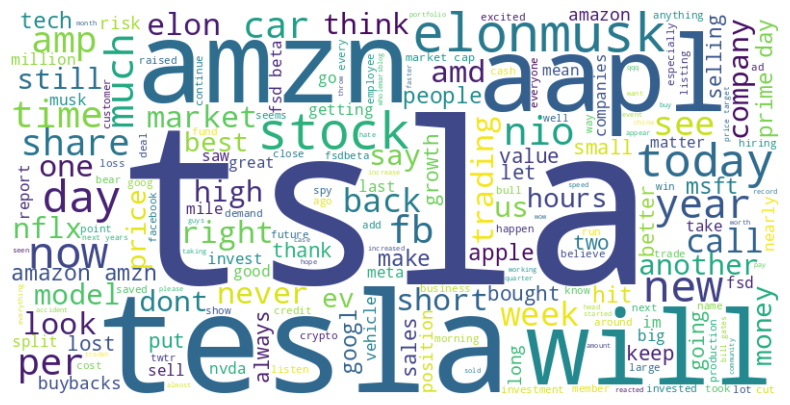

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tweet' column contains the text data
text_data = ' '.join(train['Tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Bigram Cloud

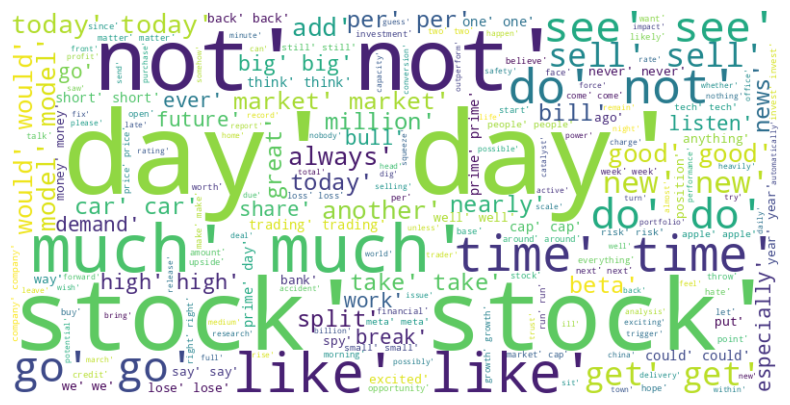

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'bigrams' column contains tuples of bigram phrases
bigram_text = ' '.join([' '.join(map(str, bigrams)) for bigrams in train['bigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

# Display the bigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Trigram cloud

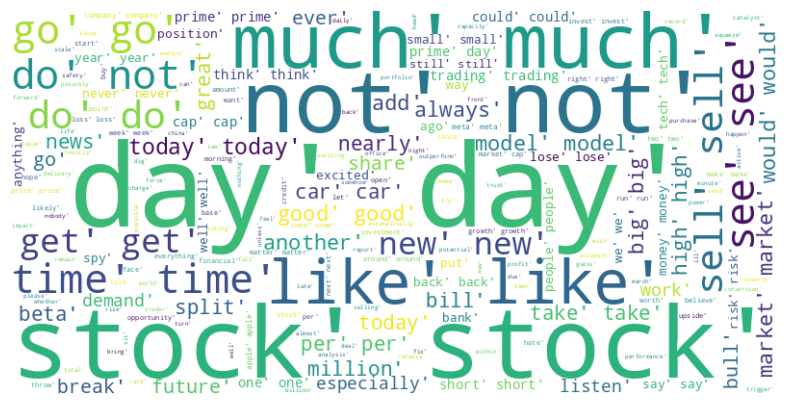

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'trigrams' column contains tuples of trigram phrases
trigram_text = ' '.join([' '.join(map(str, trigrams)) for trigrams in train['trigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

# Display the trigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sentiment Analysis using VADER

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'tokenized_tweets' is your tokenized tweets column in DataFrame 'df'
# Replace 'df' and 'tokenized_tweets' with your actual DataFrame and column names

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have your lemmatized tweets in a column 'lemmatized_tweets' of your DataFrame 'train'

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    # Join the list of lemmatized words into a single string
    text = ' '.join(text)
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the tokenized tweets column and create a new column for sentiment scores
train['sentiment_scores'] = train['lemmatized_tweets'].apply(get_sentiment_scores)
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,...,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score
61,9/15/2023,179.10,183.81,176.31,180.54,"119,728,000",i get the tsla global hiring freeze so elonmu...,"Tesla, Inc.",TSLA,[elonmusk],...,"[get, global, freeze, review, needs, face, ope...","[get, global, freeze, review, need, face, open...","[(get, VERB), (global, ADJ), (freeze, NOUN), (...","[[freeze, review], [face], [two], [volume, gro...","[freeze review, face, two, volume growth, cut,...","[(get, global), (global, freeze), (freeze, rev...","[(get, global), (global, freeze), (freeze, rev...",get global freeze review need face open two ne...,"{'neg': 0.198, 'neu': 0.631, 'pos': 0.171, 'co...",-0.1531
126,6/13/2023,212.97,217.65,209.75,213.97,"140,682,297",arcimoto is less than market cap of mil yet ...,"Tesla, Inc.",TSLA,[],...,"[less, market, cap, mil, yet, factory, product...","[less, market, cap, mil, yet, factory, product...","[(less, ADJ), (market, NOUN), (cap, NOUN), (mi...","[[market, cap, mil], [factory, production], [y...","[market cap mil, factory production, year, pro...","[(less, market), (market, cap), (cap, mil), (m...","[(less, market), (market, cap), (cap, mil), (m...",less market cap mil yet factory production per...,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.4215
135,5/31/2023,219.98,224.15,215.00,219.96,"145,995,594",the profitability of tesla is increasing elon...,"Tesla, Inc.",TSLA,"[tesla, elonmusk]",...,"[profitability, increasing]","[profitability, increase]","[(profitability, NOUN), (increase, NOUN)]","[[profitability, increase]]",[profitability increase],"[(profitability, increase)]","[(profitability, increase)]",profitability increase,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5267
94,7/31/2023,195.26,198.60,189.94,194.76,"129,469,602",aside from spy which i already give you guys e...,"Tesla, Inc.",TSLA,[],...,"[aside, spy, already, give, everyday, continue...","[aside, spy, already, give, everyday, continue...","[(aside, ADV), (spy, NOUN), (already, ADV), (g...","[[spy], [lot], [share, price]]","[spy, lot, share price]","[(aside, spy), (spy, already), (already, give)...","[(aside, spy), (spy, already), (already, give)...",aside spy already give everyday continue lot i...,"{'neg': 0.174, 'neu': 0.559, 'pos': 0.267, 'co...",0.1280
109,7/10/2023,202.03,207.20,197.20,202.07,"135,401,297",i am fully invested in tsla but i also think t...,"Tesla, Inc.",TSLA,[],...,"[fully, also, think, irresponsible, heavily, t...","[fully, also, think, irresponsible, heavily, t...","[(fully, ADV), (also, ADV), (think, VERB), (ir...","[[today], [face, macro]]","[today, face macro]","[(fully, also), (also, think), (think, irrespo...","[(fully, also), (also, think), (think, irrespo...",fully also think irresponsible heavily today e...,"{'neg': 0.302, 'neu': 0.499, 'pos': 0.199, 'co...",-0.3117
199,2/28/2023,252.70,259.52,248.25,255.70,"186,476,984",took some amd profit now just chilling waiting...,"Advanced Micro Devices, Inc.",AMD,[],...,"[took, profit, chilling, waiting, next, opport...","[take, profit, chill, wait, next, opportunity]","[(take, VERB), (profit, NOUN), (chill, NOUN), ...","[[profit, chill, wait], [opportunity]]","[profit chill wait, opportunity]","[(take, profit), (profit, chill), (chill, wait...","[(take, profit), (profit, chill), (chill, wait...",take profit chill wait next opportunity,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'comp...",0.6908
237,1/3/2023,272.38,276.71,266.37,271.30,"95,108,484",i swear this in quarterly fcf from aapl is mo...,Apple Inc.,AAPL,[],...,"[swear, quarterly, mostly, driven, cent, month...","[swear, quarterly, mostly, drive, cent, monthl...","[(swear, VERB), (quarterly, ADV), (mostly, ADV...","[[drive, cent], [storage], [bill, card]]","[drive cent, storage, bill card]","[(swear, quarterly), (quarterly, mostly), (mos...","[(swear, quarterly), (q

PCA & K-Means Clustering

In [ ]:
# Combine sentiment scores and TF-IDF vectors
X = pd.concat([train['compound_score'], tfidf_df], axis=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
explained_variance_threshold = 0.95  # Set your desired threshold

# Initialize PCA
pca = PCA()

# Fit PCA to your TF-IDF matrix
pca.fit(X)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the optimal number of components
optimal_components =np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1

In [ ]:
optimal_components

191

In [ ]:
# Step 2: Perform PCA
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X)
# Step 3: Determine the Number of Clusters for K-Means
# Use the Elbow Method to find the optimal number of clusters
inertia = []
max_clusters = 10  # Adjust the maximum number of clusters as needed

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

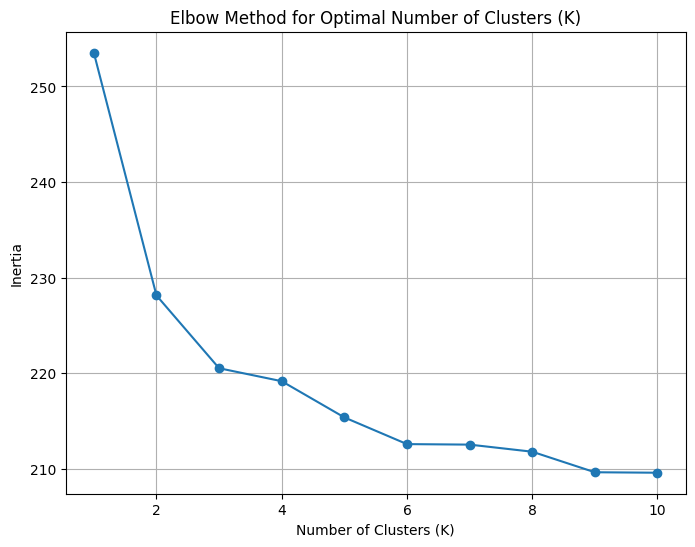

In [ ]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
optimal_clusters = 3  # Set the optimal number of clusters

# Step 4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

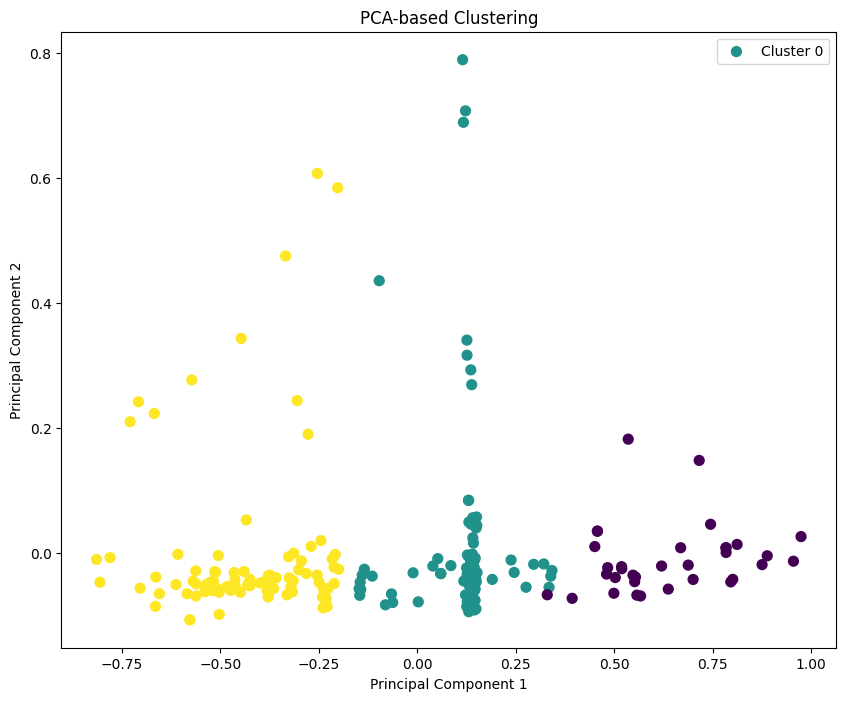

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-reduced data points with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)  # Adjust the size (s) as needed
plt.title('PCA-based Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
plt.legend(legend_labels, loc='upper right')

plt.show()


In [ ]:
optimal_clusters = 4  # Set the optimal number of clusters

# Step 4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

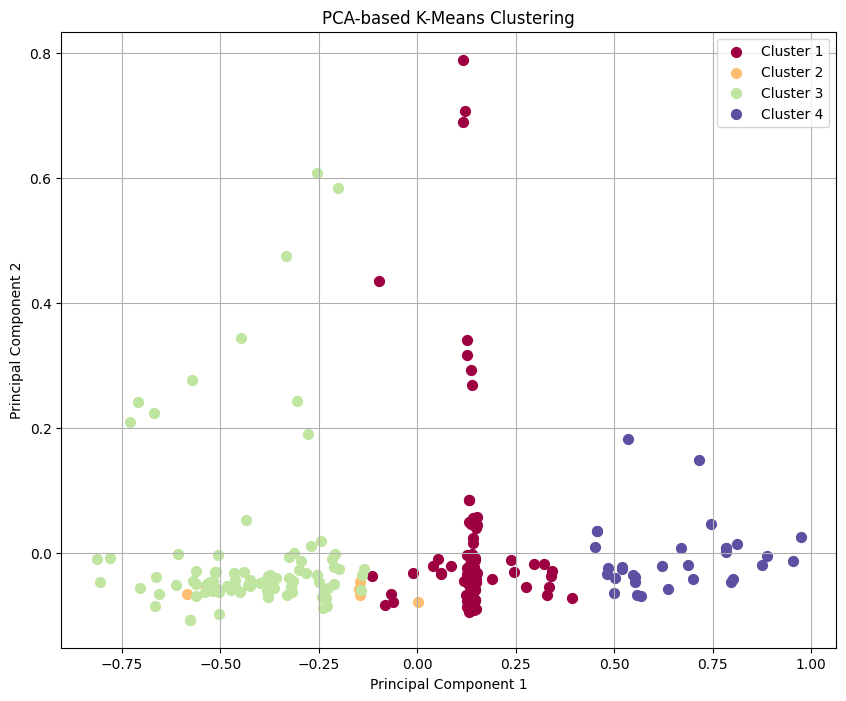

In [ ]:
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, optimal_clusters))

for cluster_num in range(optimal_clusters):
    cluster_points = X_pca[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[cluster_num], label=f'Cluster {cluster_num + 1}')

plt.title("PCA-based K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.05355835567701761


In [ ]:
# Add K-Means cluster labels to your DataFrame
train['kmeans_clusters'] = cluster_labels

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,...,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters
200,2/27/2023,253.51,259.60,248.48,255.71,"190,284,000",if nvda misses feel free throw tomatoes at me ...,"Advanced Micro Devices, Inc.",AMD,[],...,"[feel, free, throw, town, square]","[(feel, VERB), (free, ADJ), (throw, NOUN), (to...","[[throw, town, square]]",[throw town square],"[(feel, free), (free, throw), (throw, town), (...","[(feel, free), (free, throw), (throw, town), (...",feel free throw town square,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp...",0.5106,2
90,8/4/2023,193.13,197.67,189.44,193.17,"128,100,094",tsla is up in frankfurt right now trading at ...,"Tesla, Inc.",TSLA,[],...,"[right, trading]","[(right, ADJ), (trading, NOUN)]",[[trading]],[trading],"[(right, trading)]","[(right, trading)]",right trading,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
31,10/27/2023,160.01,162.95,156.91,160.31,"111,508,094",tsla has increased the price of the model s an...,"Tesla, Inc.",TSLA,[],...,"[price, model, model, x, price, model, model]","[(price, NOUN), (model, NOUN), (model, NOUN), ...","[[price, model, model], [price, model, model]]","[price model model, price model model]","[(price, model), (model, model), (model, x), (...","[(price, model), (model, model), (model, x), (...",price model model x price model model,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
189,3/14/2023,249.70,255.39,244.48,250.22,"180,018,594",microsoft now leads amazon in cloud market sha...,"Amazon.com, Inc.",AMZN,[],...,"[cloud, market, share, strength]","[(cloud, NOUN), (market, NOUN), (share, NOUN),...","[[cloud, market, share, strength]]",[cloud market share strength],"[(cloud, market), (market, share), (share, str...","[(cloud, market), (market, share), (share, str...",cloud market share strength,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.6597,2
216,2/2/2023,259.86,264.77,255.30,260.05,"216,455,703",nio ive been investing for over years ive nev...,NIO Inc.,NIO,[],...,"[never, company, large, percentage, transfer, ...","[(never, ADV), (company, VERB), (large, ADJ), ...","[[percentage, transfer], [exchange], [watch], ...","[percentage transfer, exchange, watch, tomorrow]","[(never, company), (company, large), (large, p...","[(never, company), (company, large), (large, p...",never company large percentage transfer anothe...,"{'neg': 0.053, 'neu': 0.658, 'pos': 0.288, 'co...",0.6908,2
105,7/14/2023,199.78,204.48,194.42,200.86,"133,197,109",elon says bill gates has a multi billion dolla...,"Tesla, Inc.",TSLA,[],...,"[bill, billion, dollar, short, position]","[(bill, PROPN), (billion, NUM), (dollar, NOUN)...","[[billion, dollar], [position]]","[billion dollar, position]","[(bill, billion), (billion, dollar), (dollar, ...","[(bill, billion), (billion, dollar), (dollar, ...",bill billion dollar short position,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
89,8/7/2023,193.01,197.50,188.65,192.58,"127,524,094",in german stock market tsla trading at after ...,"Tesla, Inc.",TSLA,[],...,"[german, stock, market, trading, conversion, m...","[(german, ADJ), (stock, NOUN), (market, NOUN),...","[[stock, market, trading, conversion, moment]]",[stock market trading conversion moment],"[(german, stock), (stock, market), (market, tr...","[(german, stock), (stock, market), (market, tr...",german stock market trading conversion moment,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
132,6/5/2023,217.01,221.91,212.53,218.51,"143,717,906",when we hit earlier in the year there was a l...,"Tesla, Inc.",TSLA,[],...,"[hit, year, lot, froth, feel, later, back, get...","[(hit, VERB), (year, NOUN), (lot, NOUN), (frot...","[[year, lot, froth], [opportunity]]","[year lot froth, opportunity]","[(hit, year), (year, lot), (lot, froth), (frot...","[(hit, year), (year, lot), (lot, froth), (frot...",hi

Fuzzy C Means Clustering

In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have your sentiment score column as 'sentiment_scores' and TF-IDF matrix in 'X'

# Step 1: Standardize your TF-IDF matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
max_clusters = 10  # Adjust the maximum number of clusters as needed
best_silhouette_score = -1
optimal_clusters = 2  # Default to 2 clusters if no better option is found

for n_clusters in range(2, max_clusters + 1):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=n_clusters, m=2, error=0.005, maxiter=1000, seed=0)
    cluster_membership = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(X_scaled, cluster_membership)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_clusters = n_clusters

In [ ]:
# Step 3: Perform Fuzzy C-Means Clustering with the Optimal Number of Clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=optimal_clusters, m=2, error=0.005, maxiter=1000, seed=0)
cluster_membership = np.argmax(u, axis=0)
# 'cluster_membership' now contains the cluster labels for each data point

# You can add the cluster labels to your DataFrame if needed
train['fuzzy_cmeans_clusters'] = cluster_membership

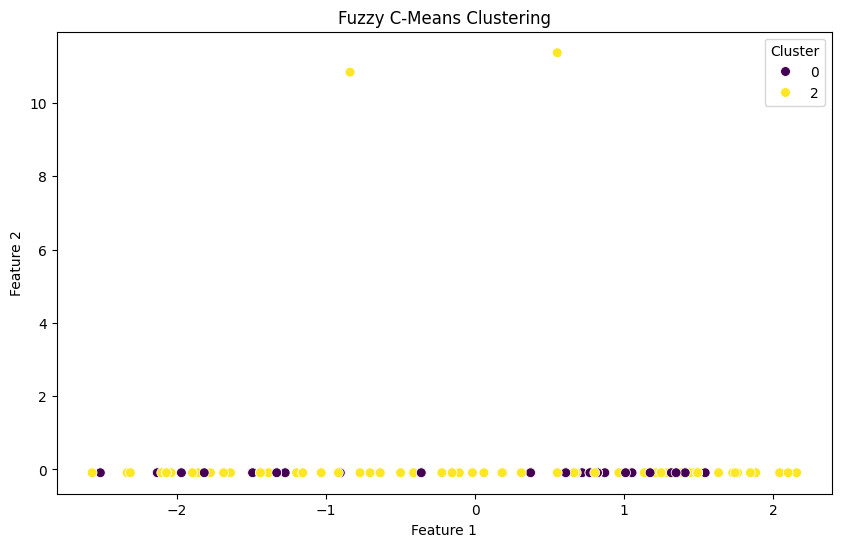

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cluster_membership' contains the cluster memberships obtained from the fuzzy C-Means clustering

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_membership, palette='viridis', s=50)
plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Cluster')
plt.show()


In [ ]:
print(f"Fuzzy Partition Coefficient (FPC): {fpc}")

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_membership)
print(f"Silhouette Score: {silhouette_avg}")

Fuzzy Partition Coefficient (FPC): 0.2500000005981769
Silhouette Score: 0.07739439290262336


Agglomerative Hierarchical Clustering

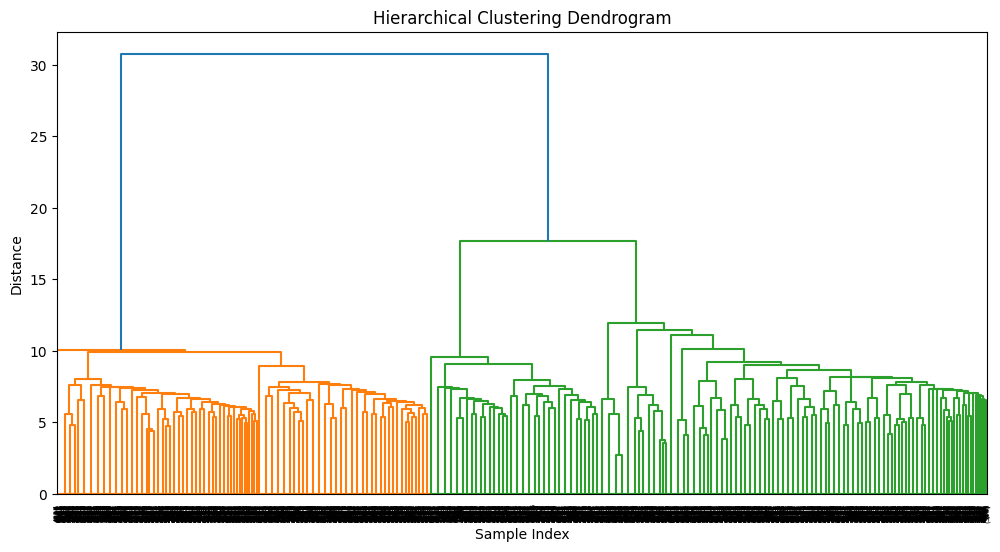

In [ ]:
import numpy as np

# Assuming you have a DataFrame named 'X' with your data
# Replace 'X' with the actual variable name holding your dataset

# Specify the sample size you want to select
sample_size = 5000

# Generate random indices within the range of your DataFrame's shape
random_indices = np.random.choice(X.shape[0], sample_size, replace=True)

# Use the random indices to select the corresponding rows from your DataFrame
sub_X = X.iloc[random_indices]

# Now, 'sub_X' contains a random subset of rows from your original DataFrame 'X'
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your sentiment score column as 'sentiment_scores' and TF-IDF matrix in 'X'

# Step 1: Create a linkage matrix using your TF-IDF matrix
linkage_matrix = linkage(sub_X, method='ward')  # You can choose a different linkage method if needed
# Step 2: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=30, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Example: Determine the optimal number of clusters using the dendrogram
max_d = 50  # Set a maximum distance threshold for cutting the dendrogram
optimal_clusters = len(np.unique(fcluster(linkage_matrix, max_d, criterion='distance')))
# Step 4: Perform Hierarchical Clustering with the Optimal Number of Clusters
cluster_assignments = fcluster(linkage_matrix, max_d, criterion='distance')

Stock Prediction using Sentiment Analysis & Generative Adversarial Network

In [ ]:
train['tweets'] = dataset['Tweet']
train.head()

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,...,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters,fuzzy_cmeans_clusters,tweets
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602",on december tesla tweeted about the model y ...,"Tesla, Inc.",TSLA,[],...,"[[car, record], [beetle]]","[car record, beetle]","[(model, break), (break, car), (car, record), ...","[(model, break), (break, car), (car, record), ...",model break car record since beetle,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,0,"On December 22, 2022, Tesla tweeted about the ..."
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",tsla tsla bull case weekly vs bear case daily ...,"Tesla, Inc.",TSLA,[],...,"[[bull, case], [bear, case]]","[bull case, bear case]","[(bull, case), (case, weekly), (weekly, bear),...","[(bull, case), (case, weekly), (weekly, bear),...",bull case weekly bear case daily pretty clear,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.7003,2,2,$TSLA #TSLA Bull case (weekly) vs. bear case (...
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",troyteslike if you add back the or so lost sa...,"Tesla, Inc.",TSLA,[TroyTeslike],...,"[[force], [impact, share]]","[force, impact share]","[(add, back), (back, lose), (lose, force), (fo...","[(add, back), (back, lose), (lose, force), (fo...",add back lose force shut due covid impact share,"{'neg': 0.227, 'neu': 0.588, 'pos': 0.185, 'co...",-0.1280,0,2,@TroyTeslike If you add back the 80K or so los...
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",hours and counting i now have full confidence...,"Tesla, Inc.",TSLA,"[Tesla, elonmusk]",...,"[[confidence, outlast, power, outage, thankful]]",[confidence outlast power outage thankful],"[(count, full), (full, confidence), (confidenc...","[(count, full), (full, confidence), (confidenc...",count full confidence outlast power outage tha...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.7906,2,2,36 hours and counting. I now have full confide...
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898",help to to trading spy qqq vix tsla to beco...,"Tesla, Inc.",TSLA,[],...,"[[trading, spy], [trader], [thread]]","[trading spy, trader, thread]","[(help, trading), (trading, spy), (spy, become...","[(help, trading), (trading, spy), (spy, become...",help trading spy become good trader possibly p...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6808,2,2,"Help to to trading $SPY , $QQQ , $VIX , $TSLA ..."


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the 'text' column and create new columns for sentiment scores
train['sentiment_scores'] = train['tweets'].apply(get_sentiment_scores)

# Extract the compound sentiment score
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [ ]:
train.sample(10)

,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name,user_mentions,...,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters,fuzzy_cmeans_clusters,tweets
133,6/2/2023,217.80,222.05,214.11,219.22,"144,193,906",koguanleo wow i hope elonmusk can take a small...,"Tesla, Inc.",TSLA,"[KoguanLeo, elonmusk]",...,"[[amount, time], [chat, point], [feedback], [s...","[amount time, chat point, feedback, shareholder]","[(wow, hope), (hope, take), (take, small), (sm...","[(wow, hope), (hope, take), (take, small), (sm...",wow hope take small amount time reach brief ch...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.8356,2,2,@KoguanLeo wow! I hope @elonmusk can take a sm...
147,5/12/2023,232.00,238.14,229.29,233.59,"150,740,500",new women speak out and reveal shocking new d...,"Tesla, Inc.",TSLA,[Tesla],...,"[[speak], [shock], [culture], [harassment]]","[speak, shock, culture, harassment]","[(new, speak), (speak, reveal), (reveal, shock...","[(new, speak), (speak, reveal), (reveal, shock...",new speak reveal shock new pervasive culture s...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.7351,3,2,NEW: Women speak out -- and reveal shocking ne...
201,2/24/2023,253.98,259.68,248.89,255.90,"191,488,891",come on amd amp spy,"Advanced Micro Devices, Inc.",AMD,[],...,[[spy]],[spy],"[(come, spy)]","[(come, spy)]",come spy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,0,COME ON $AMD &amp; $SPY https://t.co/f2VpWXKWTm
177,3/30/2023,244.81,250.39,240.85,244.40,"169,545,906",jim cramer nails it again fb,"Meta Platforms, Inc.",META,[],...,[],[],[],[],,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,0,Jim Cramer nails it again $FB https://t.co/J2A...
78,8/22/2023,186.69,191.58,183.69,187.04,"123,539,000",retweet if you want tron as a purchase method ...,"Tesla, Inc.",TSLA,[Tesla],...,"[[tron, purchase, method]]",[tron purchase method],"[(want, tron), (tron, purchase), (purchase, me...","[(want, tron), (tron, purchase), (purchase, me...",want tron purchase method,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,0,0,Retweet if you want #TRON as a purchase method...
182,3/23/2023,247.45,252.42,242.08,246.53,"170,772,703",nasdaqexchange funny that amzn and gme stand o...,"Amazon.com, Inc.",AMZN,[NasdaqExchange],...,"[[stand, increase, volatility], [think], [stock]]","[stand increase volatility, think, stock]","[(funny, stand), (stand, increase), (increase,...","[(funny, stand), (stand, increase), (increase,...",funny stand increase volatility due coincident...,"{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...",0.4404,2,2,@NasdaqExchange Funny that AMZN and GME stand ...
227,1/18/2023,266.26,269.13,260.90,264.61,"65,125,199",if you bought nflx on june you are now up a...,"Netflix, Inc.",NFLX,[],...,[],[],"[(buy, june), (june, also)]","[(buy, june), (june, also)]",buy june also,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,0,"If you bought $NFLX on June 15th, 2018, you ar..."
203,2/22/2023,255.14,260.49,250.49,256.49,"192,734,297",amd berkshire hathaway brkb facebook meta and ...,"Advanced Micro Devices, Inc.",AMD,[],...,"[[week, today]]",[week today],"[(meta, hit), (hit, new), (new, week), (week, ...","[(meta, hit), (hit, new), (new, week), (week, ...",meta hit new week today,"{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'comp...",-0.2023,0,0,"$AMD, Berkshire Hathaway $BRK.B, Facebook $MET..."
150,5/9/2023,233.87,238.92,230.72,234.86,"153,144,891",prime day was the biggest prime day event eve...,Microsoft Corporation,MSFT,[],...,"[[day], [day, event], [minute], [growth], [day]]","[day, day event, minute, growth, day]","[(prime, day), (day, big), (big, prime), (prim...","[(prime, day), (day, big), (big, prime), (prim...",prime day big prime day event ever prime per m...,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",0.3818,2,2,Prime Day 2022 was the biggest prime day event...
52,9/28/2023,174.22,177.37,167.23,173.22,"118,068,305"

In [ ]:
stock_tweets = train[['Date','compound_score']]
stock_tweets.sample(10)

,Date,compound_score
92,8/2/2023,0.6369
238,12/30/2022,0.7579
16,11/17/2023,0.0000
85,8/11/2023,0.0000
51,9/29/2023,0.5106
143,5/18/2023,0.7096
171,4/10/2023,0.2732
145,5/16/2023,0.4939
109,7/10/2023,0.0000
31,10/27/2023,0.2732


In [ ]:
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date'])
stock_tweets['Date'] = stock_tweets['Date'].dt.date
stock_tweets.shape
stock_tweets.head()

,Date,compound_score
0,2023-12-22,0.0000
1,2023-12-11,0.7003
2,2023-12-08,-0.5847
3,2023-12-07,0.8419
4,2023-12-06,0.7845


In [ ]:
stock_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            249 non-null    object 
 1   compound_score  249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
twitter_df = stock_tweets.groupby([stock_tweets['Date']]).mean()
print(twitter_df.shape)

(249, 1)


In [ ]:
twitter_df.sample(10)

,compound_score
Date,
2022-12-22,0.6808
2023-01-13,0.0000
2023-06-27,0.3818
2023-10-05,0.3612
2023-05-04,0.0000
2023-08-30,-0.5719
2023-05-09,0.3818
2023-06-07,0.0000
2023-07-13,0.7579


In [ ]:
stocks = pd.read_csv('stock.csv')
print(stocks.shape)
stocks.head()

(249, 9)


,Date,Open,High,Low,Close,Volume,Tweet,Company Name,Stock Name
0,12/22/2023,103.00,111.75,101.81,108.10,"101,077,602","On December 22, 2022, Tesla tweeted about the ...","Tesla, Inc.",TSLA
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906",$TSLA #TSLA Bull case (weekly) vs. bear case (...,"Tesla, Inc.",TSLA
2,12/8/2023,110.35,114.59,107.16,110.34,"101,543,297",@TroyTeslike If you add back the 80K or so los...,"Tesla, Inc.",TSLA
3,12/7/2023,110.51,116.27,107.52,112.71,"101,596,305",36 hours and counting. I now have full confide...,"Tesla, Inc.",TSLA
4,12/6/2023,116.55,118.80,108.24,113.06,"101,752,898","Help to to trading $SPY , $QQQ , $VIX , $TSLA ...","Tesla, Inc.",TSLA
